In [1]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis,  mode
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import io
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Machine Downtime.csv")

In [3]:
df.shape

(2500, 16)

In [4]:
df.head()

Date            Machine_ID Assembly_Line_No  Hydraulic_Pressure(bar)  \
0  31-Dec-21  Makino-L1-Unit1-2013     Shopfloor-L1                    71.04   
1  31-Dec-21  Makino-L1-Unit1-2013     Shopfloor-L1                   125.33   
2  31-Dec-21  Makino-L3-Unit1-2015     Shopfloor-L3                    71.12   
3  31-May-22  Makino-L2-Unit1-2015     Shopfloor-L2                   139.34   
4  31-Mar-22  Makino-L1-Unit1-2013     Shopfloor-L1                    60.51   

   Coolant_Pressure(bar)  Air_System_Pressure(bar)  Coolant_Temperature  \
0               6.933725                  6.284965                 25.6   
1               4.936892                  6.196733                 35.3   
2               6.839413                  6.655448                 13.1   
3               4.574382                  6.560394                 24.4   
4               6.893182                  6.141238                  4.1   

   Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_Temperature(°C)  \
0                           46.0                             33.4   
1                           47.4                             34.6   
2                           40.7                             33.0   
3                           44.2                             40.6   
4                           47.3                             31.4   

   Spindle_Vibration(µm)  Tool_Vibration(µm)  Spindle_Speed(RPM)  \
0                  1.291              26.492             25892.0   
1                  1.382              25.274             19856.0   
2                  1.319              30.608             19851.0   
3                  0.618              30.791             18461.0   
4                  0.983              25.516             26526.0   

   Voltage(volts)  Torque(Nm)  Cutting(kN)         Downtime  
0           335.0   24.055326         3.58  Machine_Failure  
1           368.0   14.202890         2.68  Machine_Failure  
2           325.0   24.049267         3.55  Machine_Failure  
3           360.0   25.860029         3.55  Machine_Failure  
4           354.0   25.515874         3.55  Machine_Failure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(°C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(°C)  2493 non-null   float64
 9   Spindle_Vibration(µm)            2489 non-null   float64
 10  Tool_Vibration(µm)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [6]:
# Mode imputation for object columns
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Mean imputation for float64 columns
float_cols = df.select_dtypes(include=['float64']).columns
for col in float_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [7]:
#check for null values
#pd.isnull(df).sum()

In [8]:
# drop null values
#df.dropna(inplace=True)

In [9]:
df.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2500 non-null   float64
 4   Coolant_Pressure(bar)            2500 non-null   float64
 5   Air_System_Pressure(bar)         2500 non-null   float64
 6   Coolant_Temperature              2500 non-null   float64
 7   Hydraulic_Oil_Temperature(°C)    2500 non-null   float64
 8   Spindle_Bearing_Temperature(°C)  2500 non-null   float64
 9   Spindle_Vibration(µm)            2500 non-null   float64
 10  Tool_Vibration(µm)               2500 non-null   float64
 11  Spindle_Speed(RPM)               2500 non-null   float64
 12  Voltage(volts)      

In [11]:
selected_columns = [
    'Hydraulic_Pressure(bar)',
    'Coolant_Pressure(bar)',
    'Air_System_Pressure(bar)',
    'Coolant_Temperature',
    'Hydraulic_Oil_Temperature(°C)',
    'Spindle_Bearing_Temperature(°C)',
    'Spindle_Vibration(µm)',
    'Tool_Vibration(µm)',
    'Spindle_Speed(RPM)',
    'Voltage(volts)',
    'Torque(Nm)',
    'Cutting(kN)'
]

In [12]:
# a) Measures of Central Tendency
means = df[selected_columns].mean()
modes = df[selected_columns].mode().iloc[0]  # Mode might return multiple values, so we take the first one
medians = df[selected_columns].median()

central_tendency = pd.DataFrame({
    'Mean': means,
    'Mode': modes,
    'Median': medians
})

In [13]:
print("Measures of Central Tendency:")
print(central_tendency)
print("\n")

Measures of Central Tendency:
                                         Mean          Mode        Median
Hydraulic_Pressure(bar)            101.409084     88.279134     96.985000
Coolant_Pressure(bar)                4.947058      4.566854      4.947058
Air_System_Pressure(bar)             6.499275      6.499275      6.502981
Coolant_Temperature                 18.559887     26.400000     21.100000
Hydraulic_Oil_Temperature(°C)       47.618317     47.500000     47.618317
Spindle_Bearing_Temperature(°C)     35.063698     34.600000     35.100000
Spindle_Vibration(µm)                1.009334      1.009334      1.009334
Tool_Vibration(µm)                  25.411975     25.411975     25.420488
Spindle_Speed(RPM)               20274.792302  17726.000000  20152.000000
Voltage(volts)                     348.996792    337.000000    349.000000
Torque(Nm)                          25.234968     35.580334     24.673213
Cutting(kN)                          2.782551      3.550000      2.780000




In [14]:
# b) Measures of Dispersion
variances = df[selected_columns].var()
std_devs = df[selected_columns].std()
ranges = df[selected_columns].max() - df[selected_columns].min()

dispersion = pd.DataFrame({
    'Variance': variances,
    'Standard Deviation': std_devs,
    'Range': ranges
})


In [15]:
print("Measures of Dispersion:")
print(dispersion)
#print("\n")

Measures of Dispersion:
                                     Variance  Standard Deviation  \
Hydraulic_Pressure(bar)          9.137705e+02           30.228637   
Coolant_Pressure(bar)            9.871584e-01            0.993558   
Air_System_Pressure(bar)         1.647481e-01            0.405892   
Coolant_Temperature              7.282772e+01            8.533916   
Hydraulic_Oil_Temperature(°C)    1.411197e+01            3.756590   
Spindle_Bearing_Temperature(°C)  1.413419e+01            3.759547   
Spindle_Vibration(µm)            1.170615e-01            0.342143   
Tool_Vibration(µm)               4.125440e+01            6.422959   
Spindle_Speed(RPM)               1.480735e+07         3848.032234   
Voltage(volts)                   2.054040e+03           45.321518   
Torque(Nm)                       3.736531e+01            6.112717   
Cutting(kN)                      3.792391e-01            0.615824   

                                        Range  
Hydraulic_Pressure(bar)       

In [16]:
# c) Skewness: measures the degree of asymmetry of the distribution
# Determine skewness and classify as negative skew, right skew, or approximately normal distribution.

In [17]:
skewness = df[selected_columns].apply(skew)

skewness_classification = {}
for col, val in skewness.items():
    if val < -1:
        skewness_classification[col] = 'Strongly Negative Skew'
    elif -1 <= val < -0.5:
        skewness_classification[col] = 'Moderately Negative Skew'
    elif -0.5 <= val <= 0.5:
        skewness_classification[col] = 'Approximately Symmetric'
    elif 0.5 < val <= 1:
        skewness_classification[col] = 'Moderately Positive Skew'
    else:
        skewness_classification[col] = 'Strongly Positive Skew'

In [18]:
print("Skewness:")
for col, val in zip(selected_columns, skewness):
    print(f"{col}: {val} ({skewness_classification[col]})")
print("\n")

Skewness:
Hydraulic_Pressure(bar): 0.19735186604055754 (Approximately Symmetric)
Coolant_Pressure(bar): 0.14755414573465 (Approximately Symmetric)
Air_System_Pressure(bar): -0.05304820237853687 (Approximately Symmetric)
Coolant_Temperature: 0.10849676056691147 (Approximately Symmetric)
Hydraulic_Oil_Temperature(°C): -0.0022965666024836033 (Approximately Symmetric)
Spindle_Bearing_Temperature(°C): -0.035970778488257256 (Approximately Symmetric)
Spindle_Vibration(µm): 0.001534573693442964 (Approximately Symmetric)
Tool_Vibration(µm): -0.06110303642976081 (Approximately Symmetric)
Spindle_Speed(RPM): -0.1725786368925274 (Approximately Symmetric)
Voltage(volts): -0.028675077539152445 (Approximately Symmetric)
Torque(Nm): 0.03068858180757777 (Approximately Symmetric)
Cutting(kN): 0.1140539861786415 (Approximately Symmetric)




In [19]:
# d) Kurtosis : It measures the degree of peakedness and flatness of a distribution
kurtosis_values = df[selected_columns].apply(kurtosis)

print("Kurtosis:")
print(kurtosis_values)

Kurtosis:
Hydraulic_Pressure(bar)           -0.912504
Coolant_Pressure(bar)              1.196576
Air_System_Pressure(bar)           0.016522
Coolant_Temperature                1.581075
Hydraulic_Oil_Temperature(°C)      0.055226
Spindle_Bearing_Temperature(°C)   -0.037886
Spindle_Vibration(µm)             -0.007925
Tool_Vibration(µm)                 0.017304
Spindle_Speed(RPM)                 1.350110
Voltage(volts)                    -0.085557
Torque(Nm)                        -0.445652
Cutting(kN)                       -1.082027
dtype: float64


### EDA

In [20]:
 # Descriptive Statistics
print("2. Descriptive Statistics:")
df.describe()

2. Descriptive Statistics:


Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
count              2500.000000            2500.000000   
mean                101.409084               4.947058   
std                  30.228637               0.993558   
min                 -14.326454               0.325000   
25%                  76.470719               4.466685   
50%                  96.985000               4.947058   
75%                 126.301071               5.512482   
max                 191.000000              11.350000   

       Air_System_Pressure(bar)  Coolant_Temperature  \
count               2500.000000          2500.000000   
mean                   6.499275            18.559887   
std                    0.405892             8.533916   
min                    5.063480             4.100000   
25%                    6.220267            10.475000   
50%                    6.502981            21.100000   
75%                    6.779330            25.600000   
max                    7.973992            98.200000   

       Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_Temperature(°C)  \
count                    2500.000000                      2500.000000   
mean                       47.618317                        35.063698   
std                         3.756590                         3.759547   
min                        35.200000                        22.600000   
25%                        45.100000                        32.500000   
50%                        47.618317                        35.100000   
75%                        50.100000                        37.600000   
max                        61.400000                        49.500000   

       Spindle_Vibration(µm)  Tool_Vibration(µm)  Spindle_Speed(RPM)  \
count            2500.000000         2500.000000         2500.000000   
mean                1.009334           25.411975        20274.792302   
std                 0.342143            6.422959         3848.032234   
min                -0.461000            2.161000            0.000000   
25%                 0.778750           21.099750        17919.000000   
50%                 1.009334           25.420488        20152.000000   
75%                 1.234250           29.766250        22489.750000   
max                 2.000000           45.726000        27957.000000   

       Voltage(volts)   Torque(Nm)  Cutting(kN)  
count     2500.000000  2500.000000  2500.000000  
mean       348.996792    25.234968     2.782551  
std         45.321518     6.112717     0.615824  
min        202.000000     0.000000     1.800000  
25%        319.000000    21.704037     2.250000  
50%        349.000000    24.673213     2.780000  
75%        380.000000    30.514008     3.262500  
max        479.000000    55.552400     3.930000

5. Identifying Outliers:


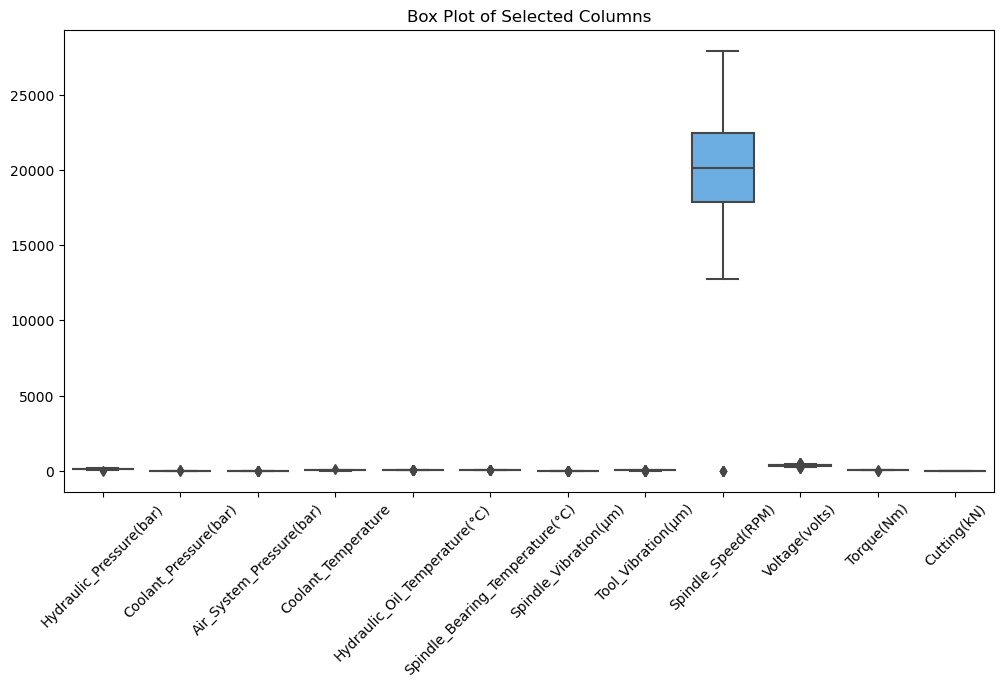

In [21]:
# 5. Identifying Outliers
print("5. Identifying Outliers:")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[selected_columns])
plt.xticks(rotation=45)
plt.title("Box Plot of Selected Columns")
plt.show()
print("\n")

6. Correlation Analysis:


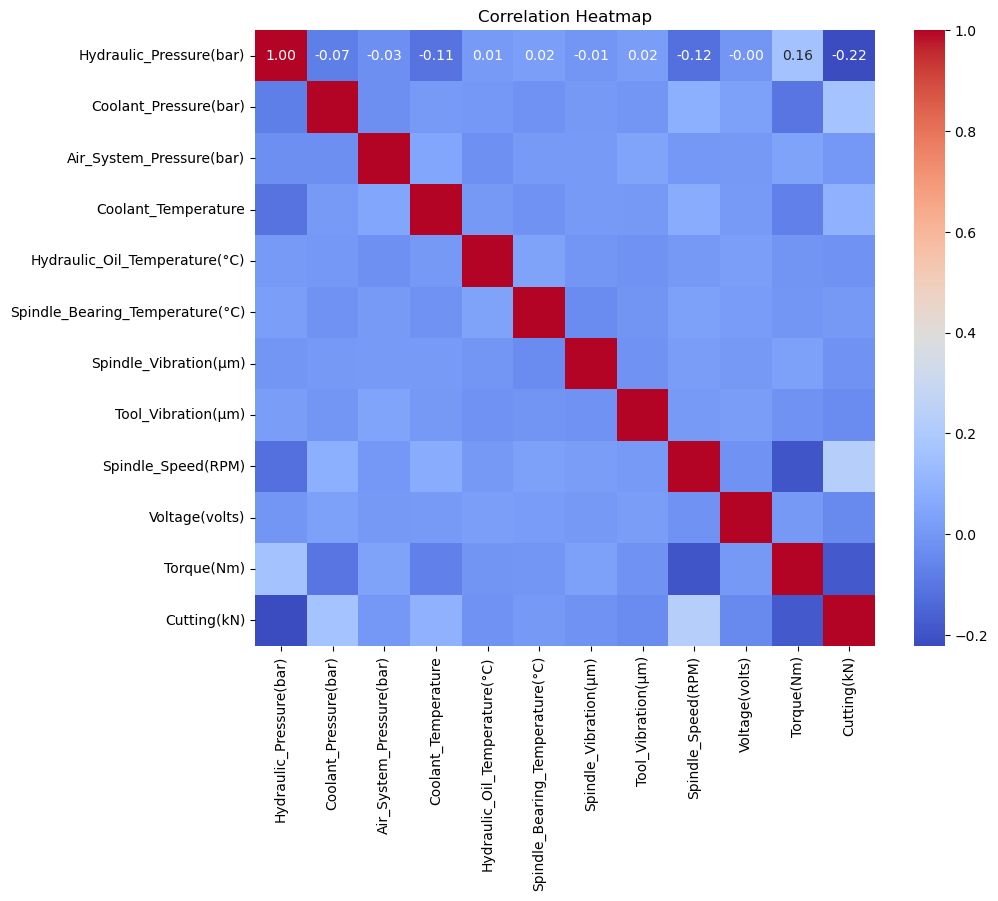

In [22]:
print("6. Correlation Analysis:")
correlation_matrix = df[selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
print("\n")

8. Identifying Trends and Patterns:


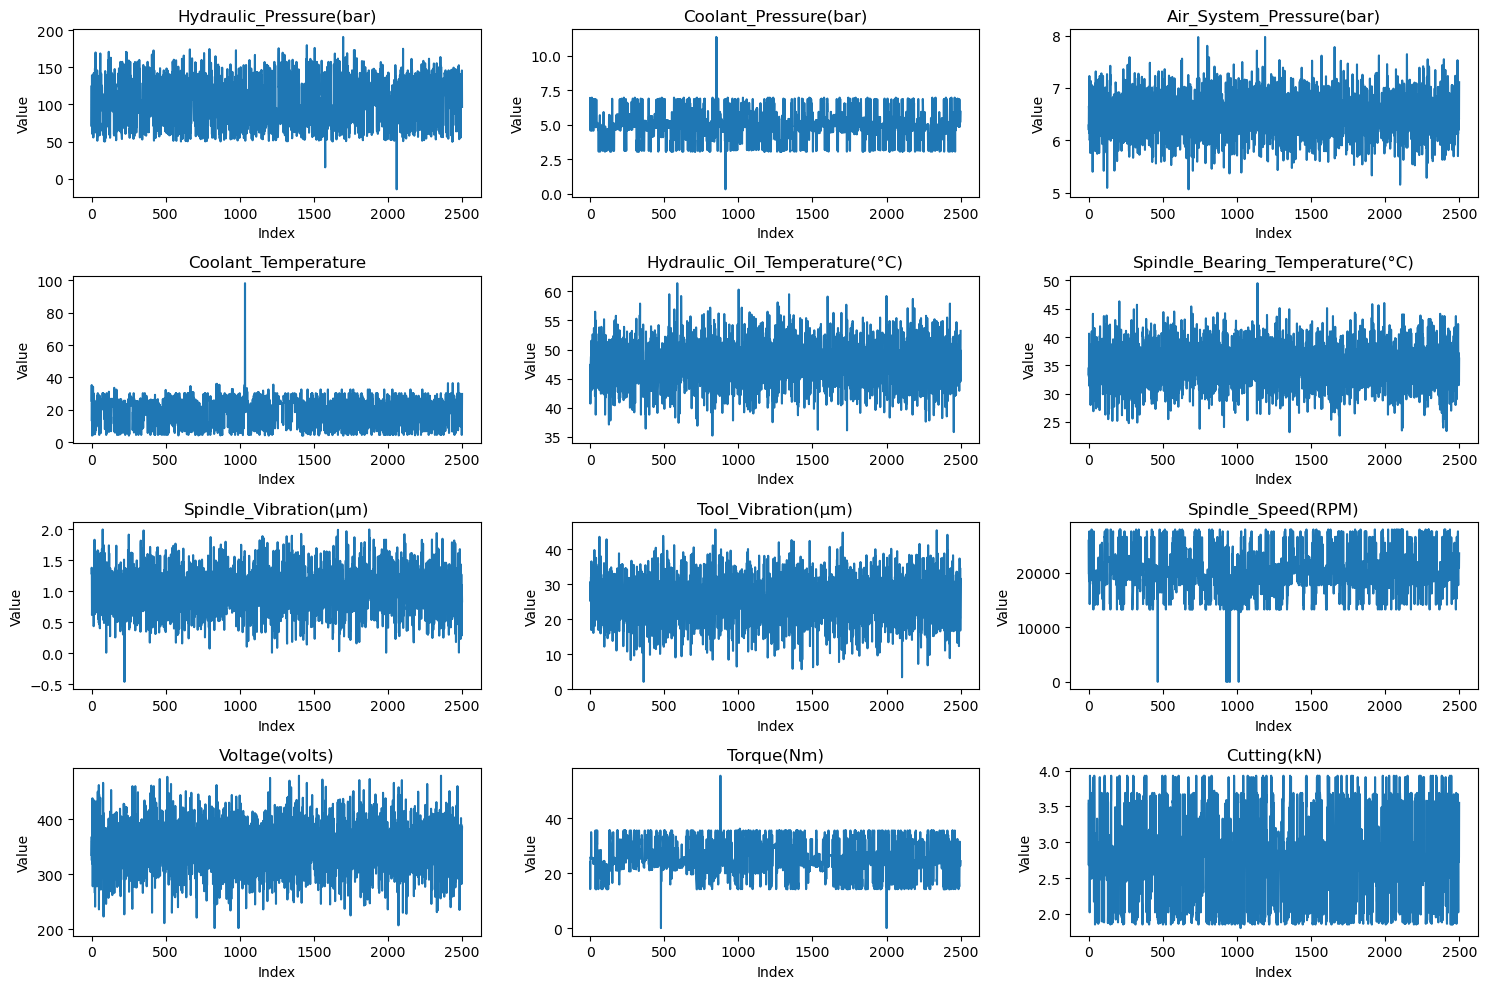

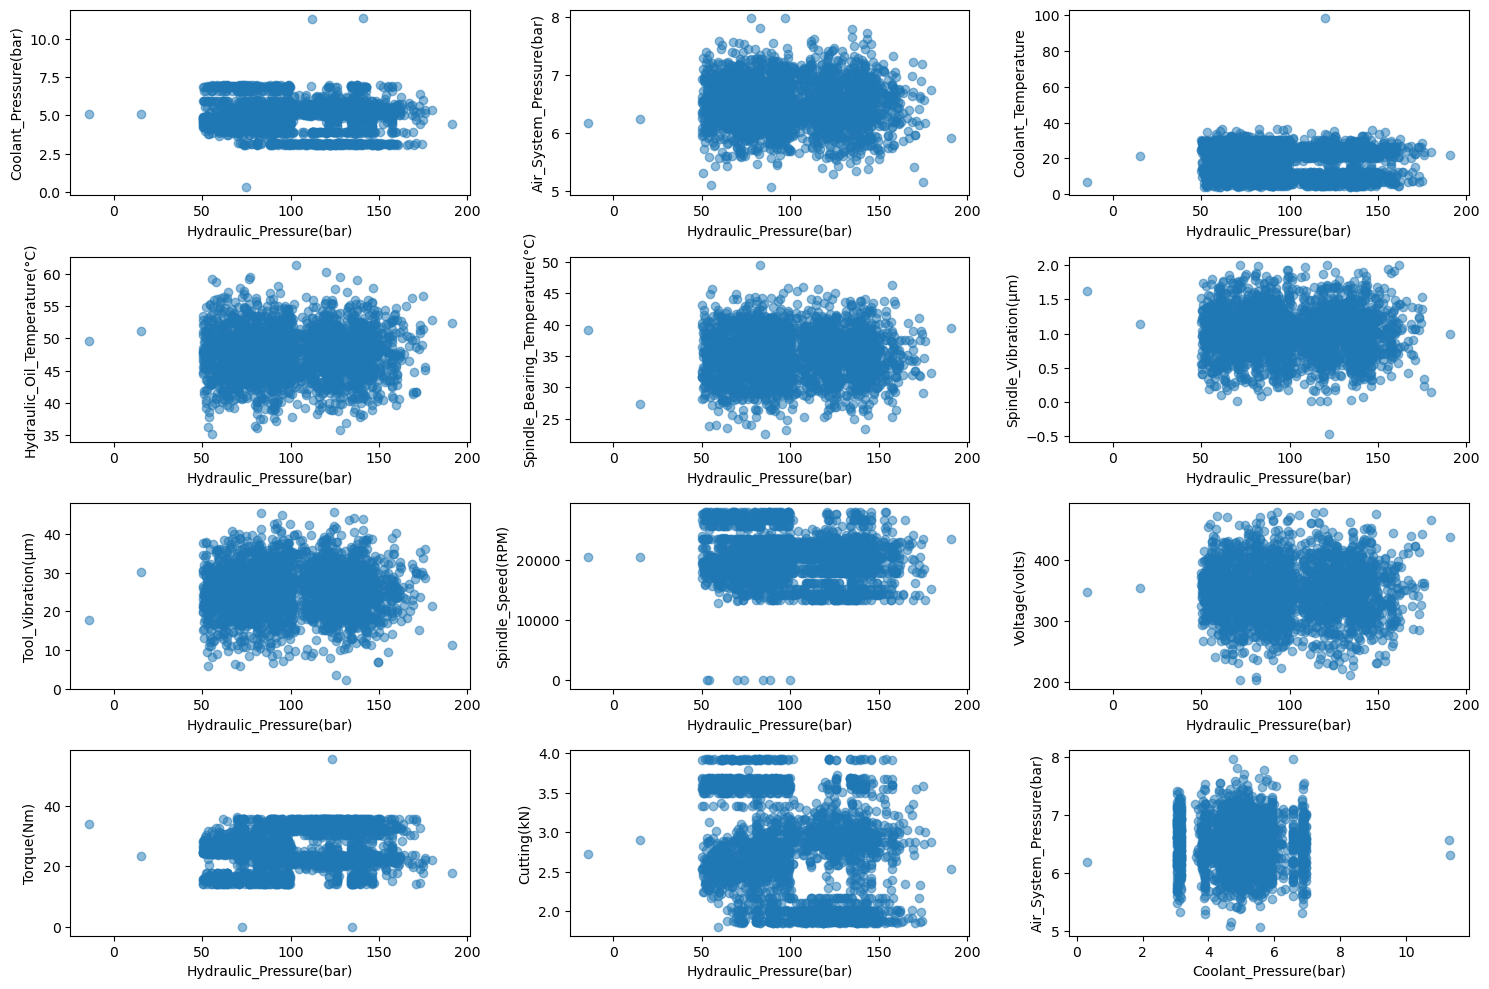

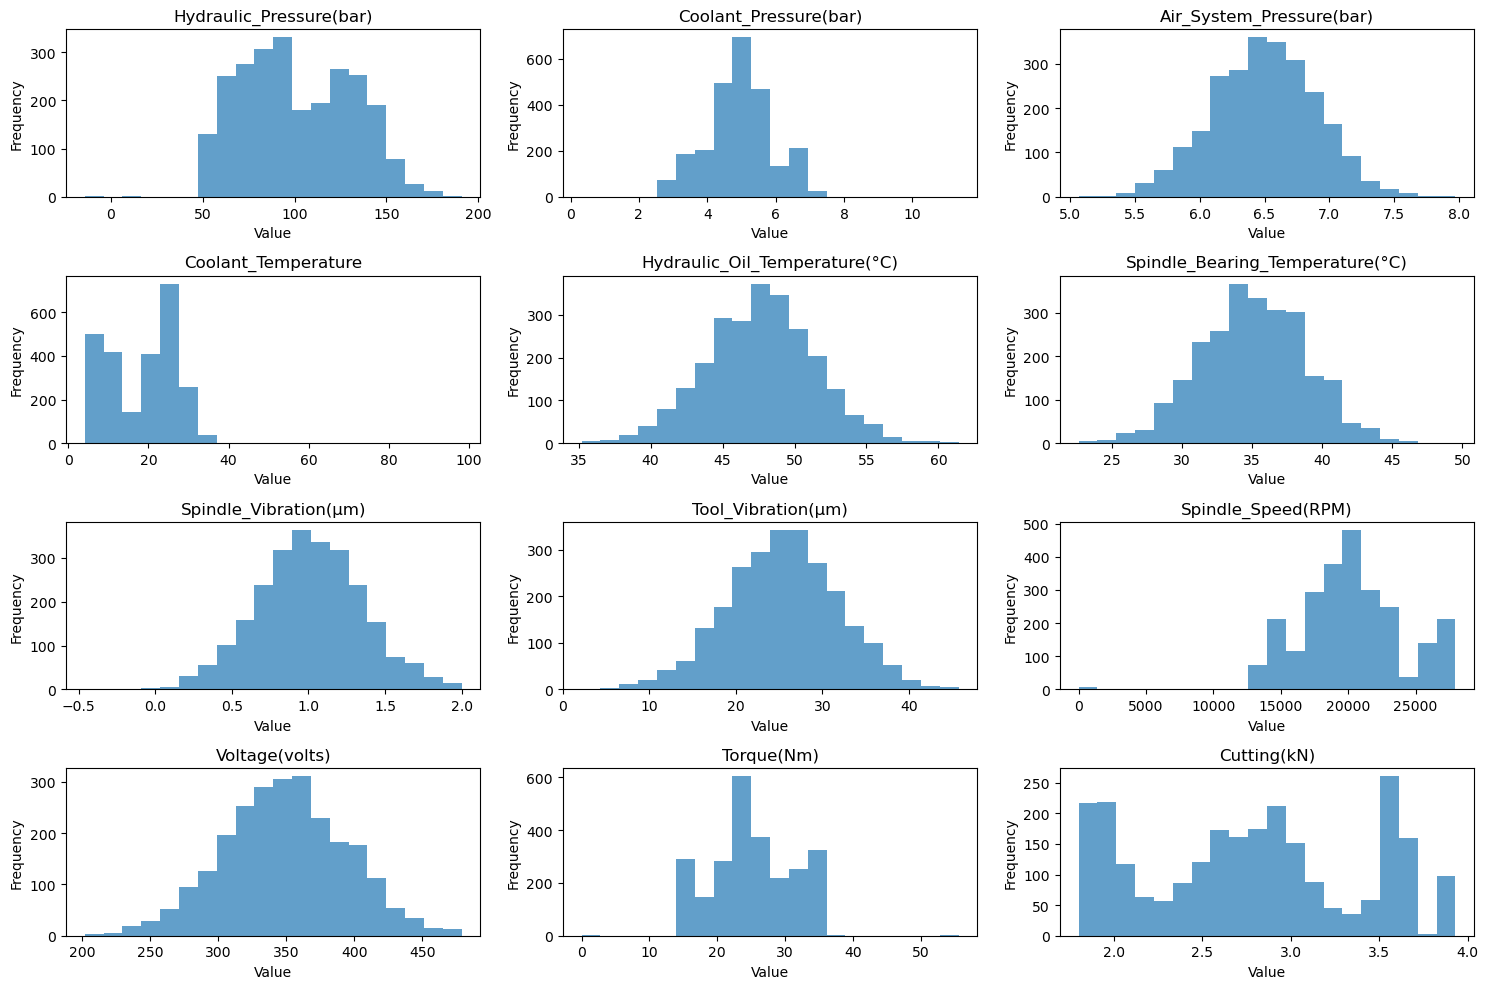

In [23]:
# 8. Identifying Trends and Patterns
print("8. Identifying Trends and Patterns:")

# Visualize trends and patterns using line plots for each column
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(4, 3, i)
    plt.plot(df.index, df[col])
    plt.title(col)
    plt.xlabel("Index")
    plt.ylabel("Value")
plt.tight_layout()
plt.show()

# Visualize trends and patterns using scatter plots for each pair of columns
plt.figure(figsize=(15, 10))
subplot_index = 1
for i in range(len(selected_columns)):
    for j in range(i + 1, len(selected_columns)):
        if subplot_index <= 12:  # Ensure that the index does not exceed the total number of subplots
            plt.subplot(4, 3, subplot_index)
            plt.scatter(df[selected_columns[i]], df[selected_columns[j]], alpha=0.5)
            plt.xlabel(selected_columns[i])
            plt.ylabel(selected_columns[j])
            subplot_index += 1
plt.tight_layout()
plt.show()

# Visualize distribution using histograms for each column
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(4, 3, i)
    plt.hist(df[col], bins=20, alpha=0.7)
    plt.title(col)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [24]:
# 10. Business Insights and Recommendations

# Insights:
# 1. Variability in Hydraulic Pressure, Coolant Pressure, and Air System Pressure indicates potential fluctuations in the manufacturing process.
# 2. Skewness and kurtosis analysis suggest deviations from normal distribution for several parameters, highlighting non-uniformity in data distribution.
# 3. Correlation analysis reveals strong correlations between certain parameters (e.g., Hydraulic Pressure and Torque), indicating potential interdependencies in the manufacturing process.
# 4. Outlier detection in parameter values may signify anomalies or irregularities that require further investigation.

# Recommendations:
# 1. Continuous Monitoring: Implement real-time monitoring systems to track variations in hydraulic pressure, coolant pressure, and air system pressure. Early detection of fluctuations can help prevent process disruptions and maintain consistent quality.
# 2. Data Normalization: Apply data normalization techniques to address skewness and kurtosis issues, ensuring a more uniform distribution of data. This can improve the accuracy of predictive models and statistical analyses.
# 3. Root Cause Analysis: Conduct root cause analysis to identify factors contributing to outliers in parameter values. Addressing underlying issues such as equipment malfunction or process inefficiencies can enhance overall process stability and reliability.
# 4. Predictive Maintenance: Leverage correlations between parameters to develop predictive maintenance models. Predictive maintenance can minimize downtime by anticipating equipment failures and scheduling proactive maintenance activities.
# 5. Process Optimization: Explore opportunities for process optimization based on insights gained from comparative analysis across different machine IDs or assembly lines. Implementing optimized parameters and best practices can enhance productivity and reduce manufacturing costs.

# This section provides actionable insights and recommendations for leveraging EDA findings to drive business improvements in the manufacturing domain.
# Source Wikipedia, Kaggle

In [25]:
all_columns = [
    'Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
    'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 'Coolant_Temperature',
    'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)',
    'Spindle_Vibration(µm)', 'Tool_Vibration(µm)', 'Spindle_Speed(RPM)',
    'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)', 'Downtime'
]

date_format = '%Y-%m-%d'  # Specify your date format here
df['Date'] = pd.to_datetime(df['Date'], format=date_format, errors='coerce')
df['Downtime'] = pd.to_numeric(df['Downtime'], errors='coerce')

df = df.replace([float('inf'), float('-inf')], pd.NA)

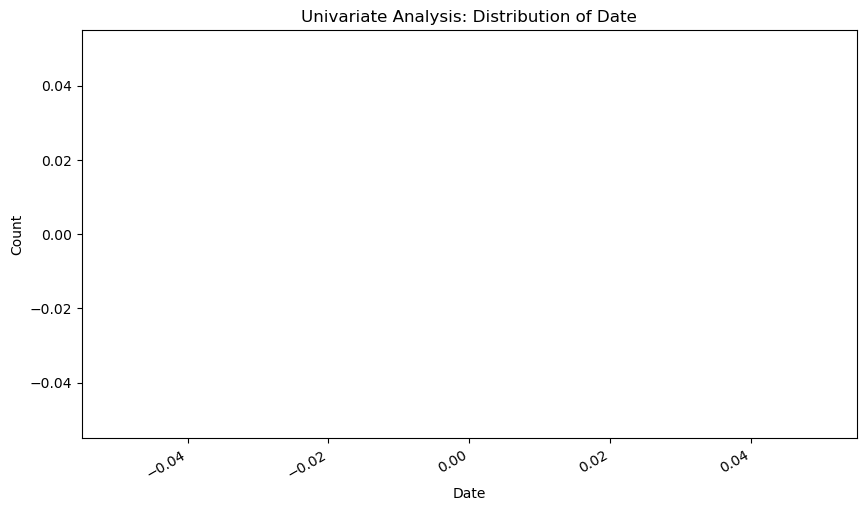

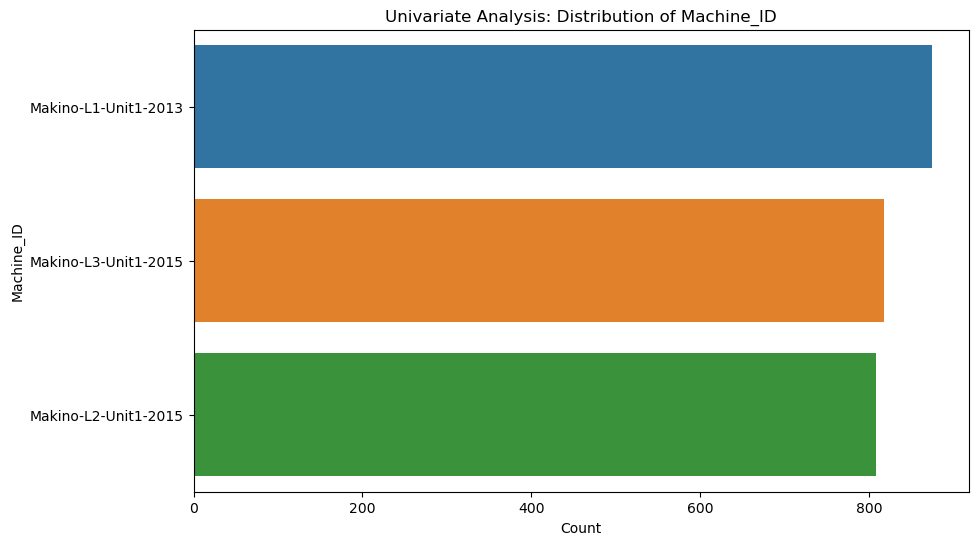

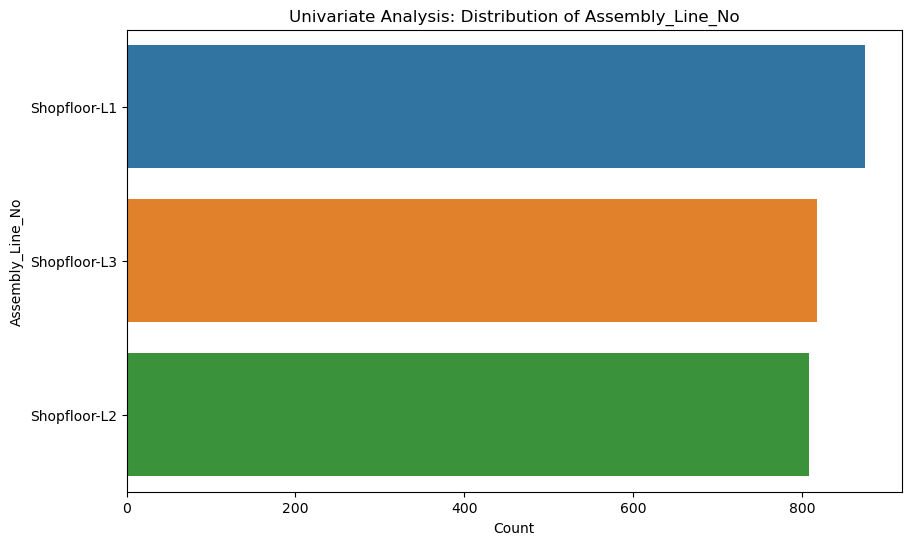

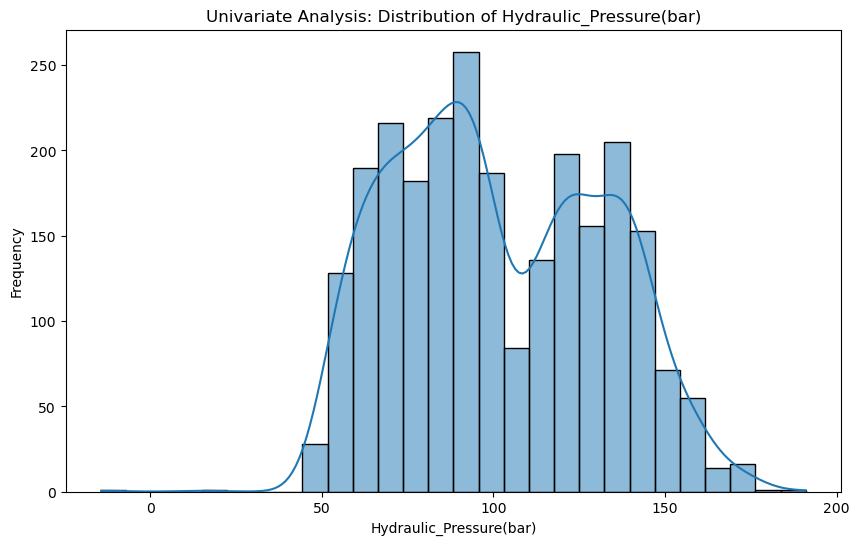

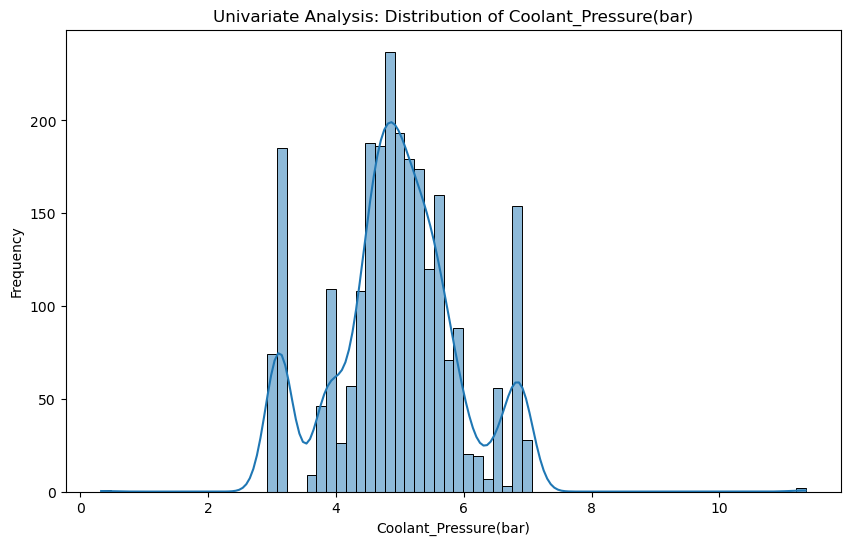

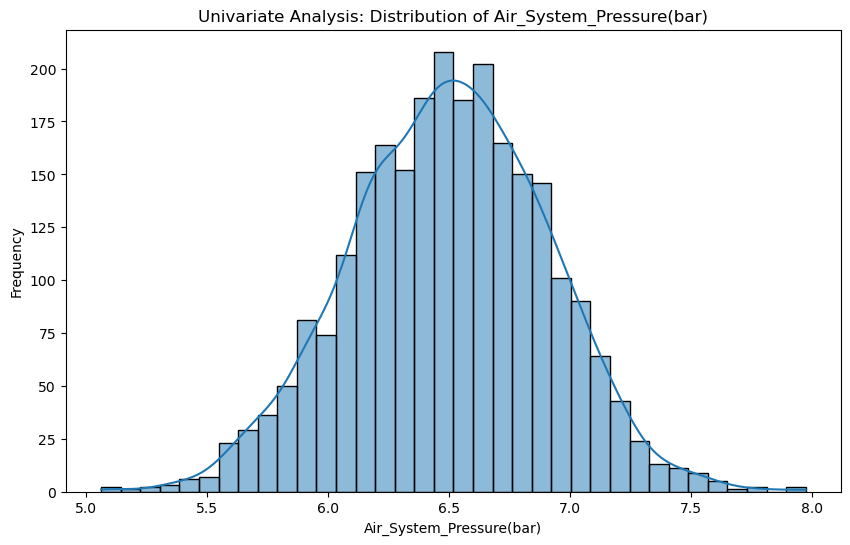

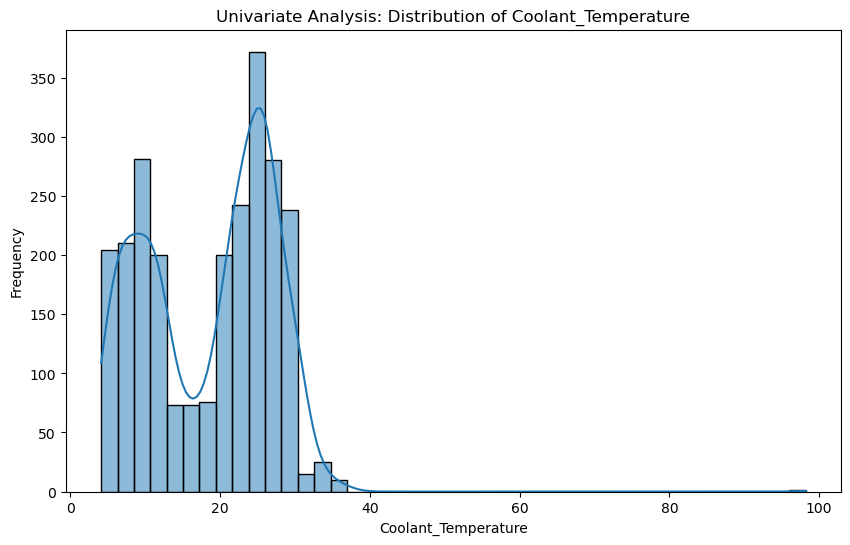

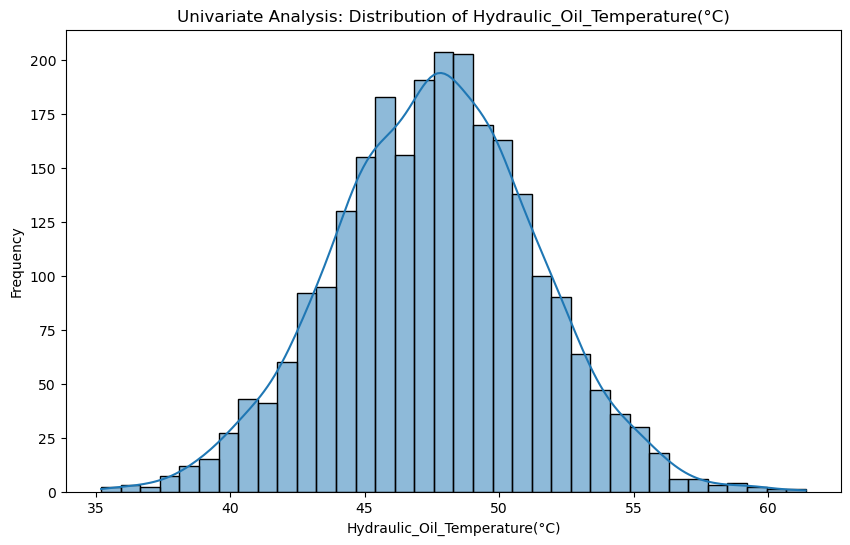

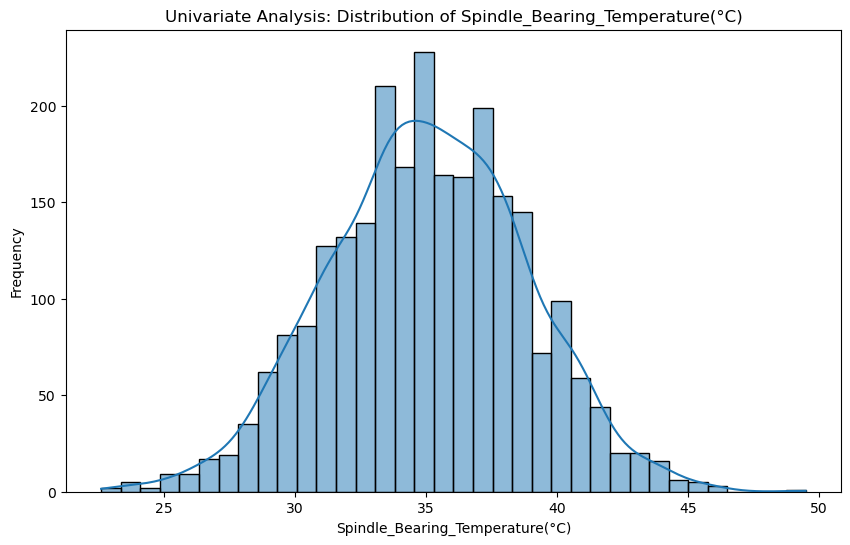

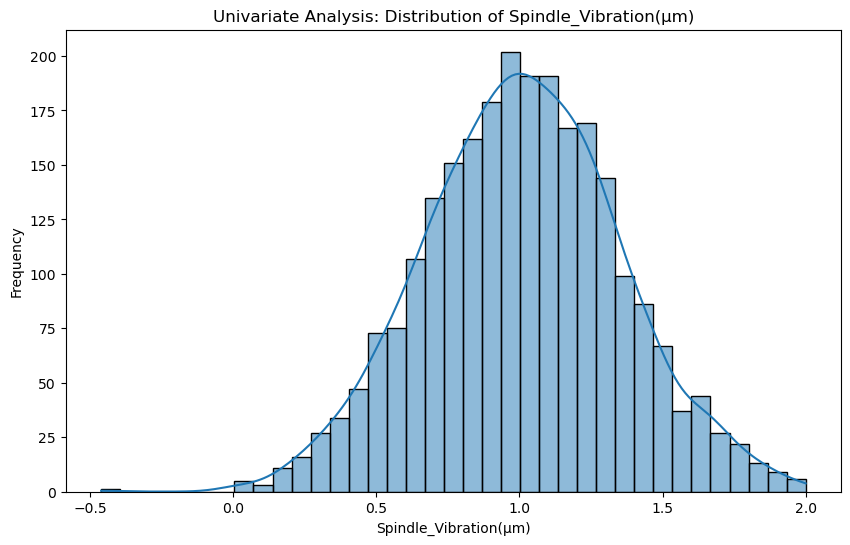

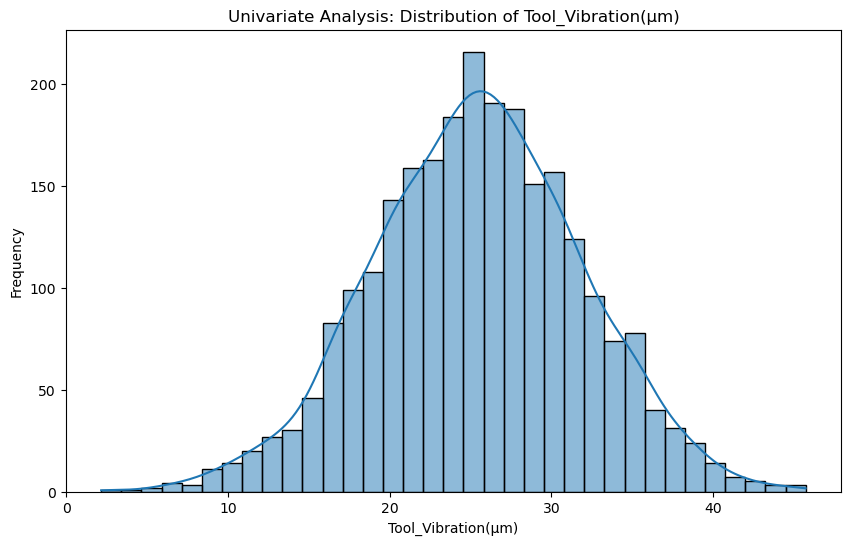

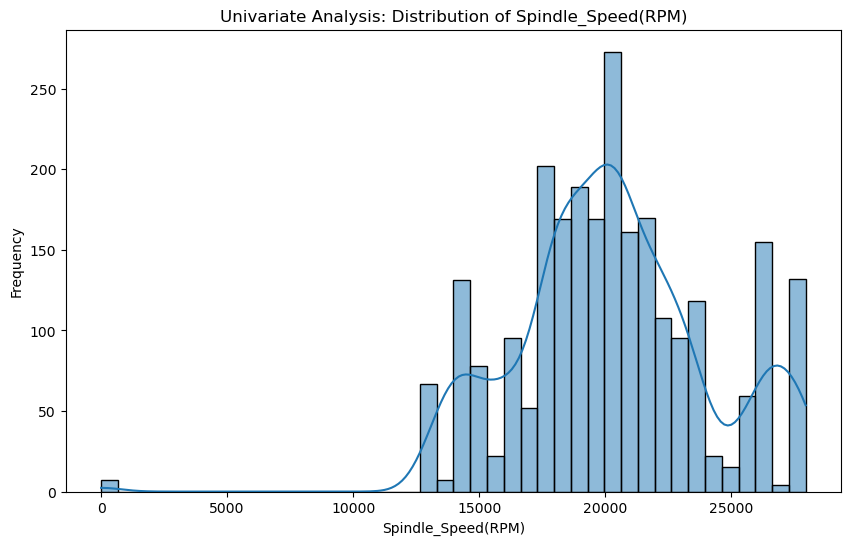

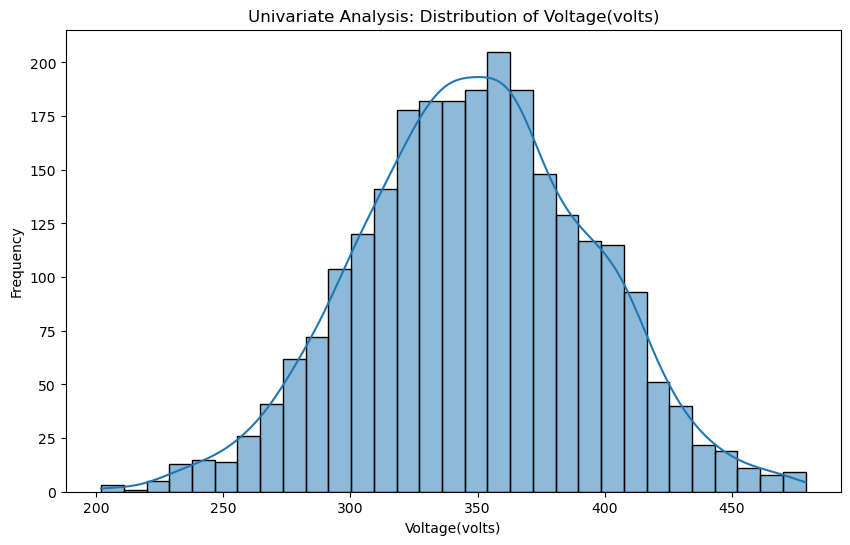

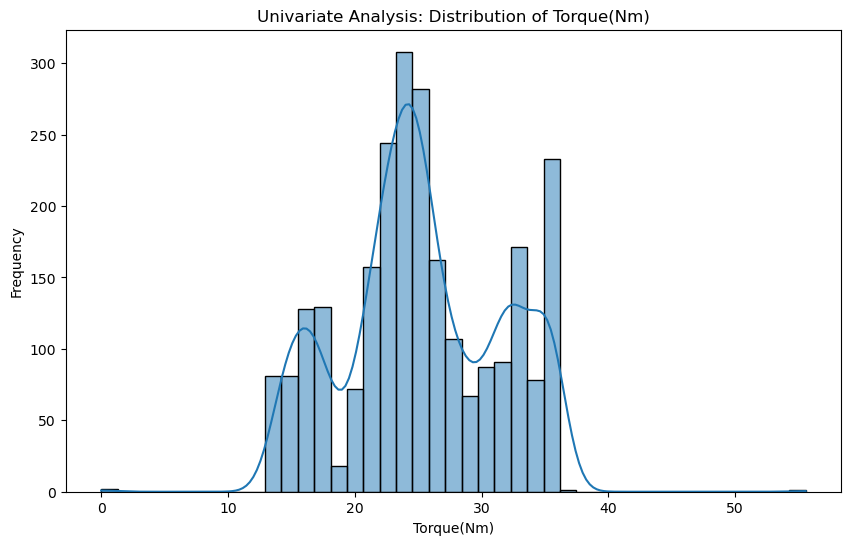

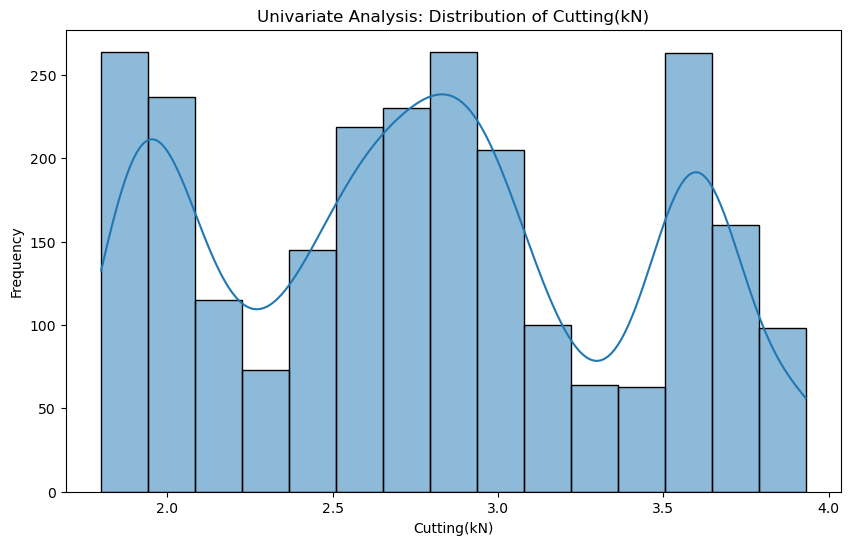

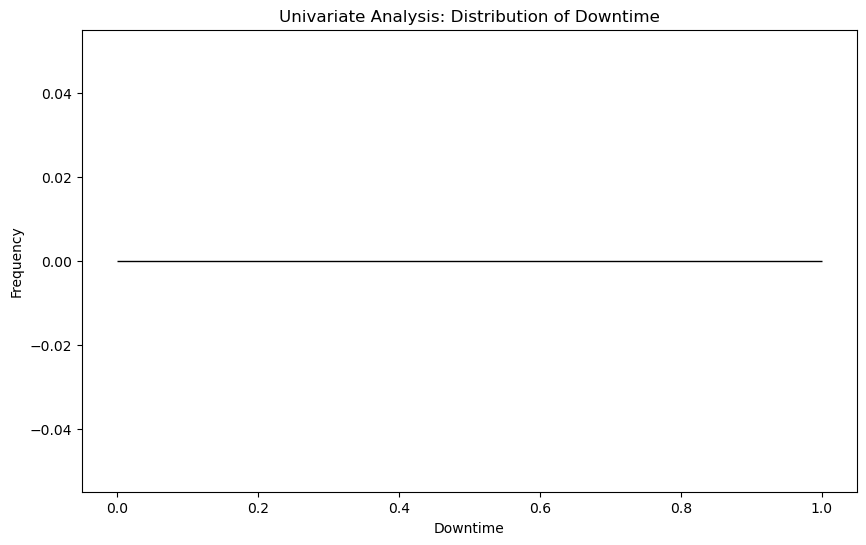

In [26]:
# Set use_inf_as_na to True to convert inf values to NaN
for col in all_columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f"Univariate Analysis: Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    elif df[col].dtype == 'object':
        plt.figure(figsize=(10, 6))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f"Univariate Analysis: Distribution of {col}")
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()
    elif df[col].dtype == 'datetime64[ns]':
        plt.figure(figsize=(10, 6))
        df[col].value_counts().sort_index().plot()
        plt.title(f"Univariate Analysis: Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

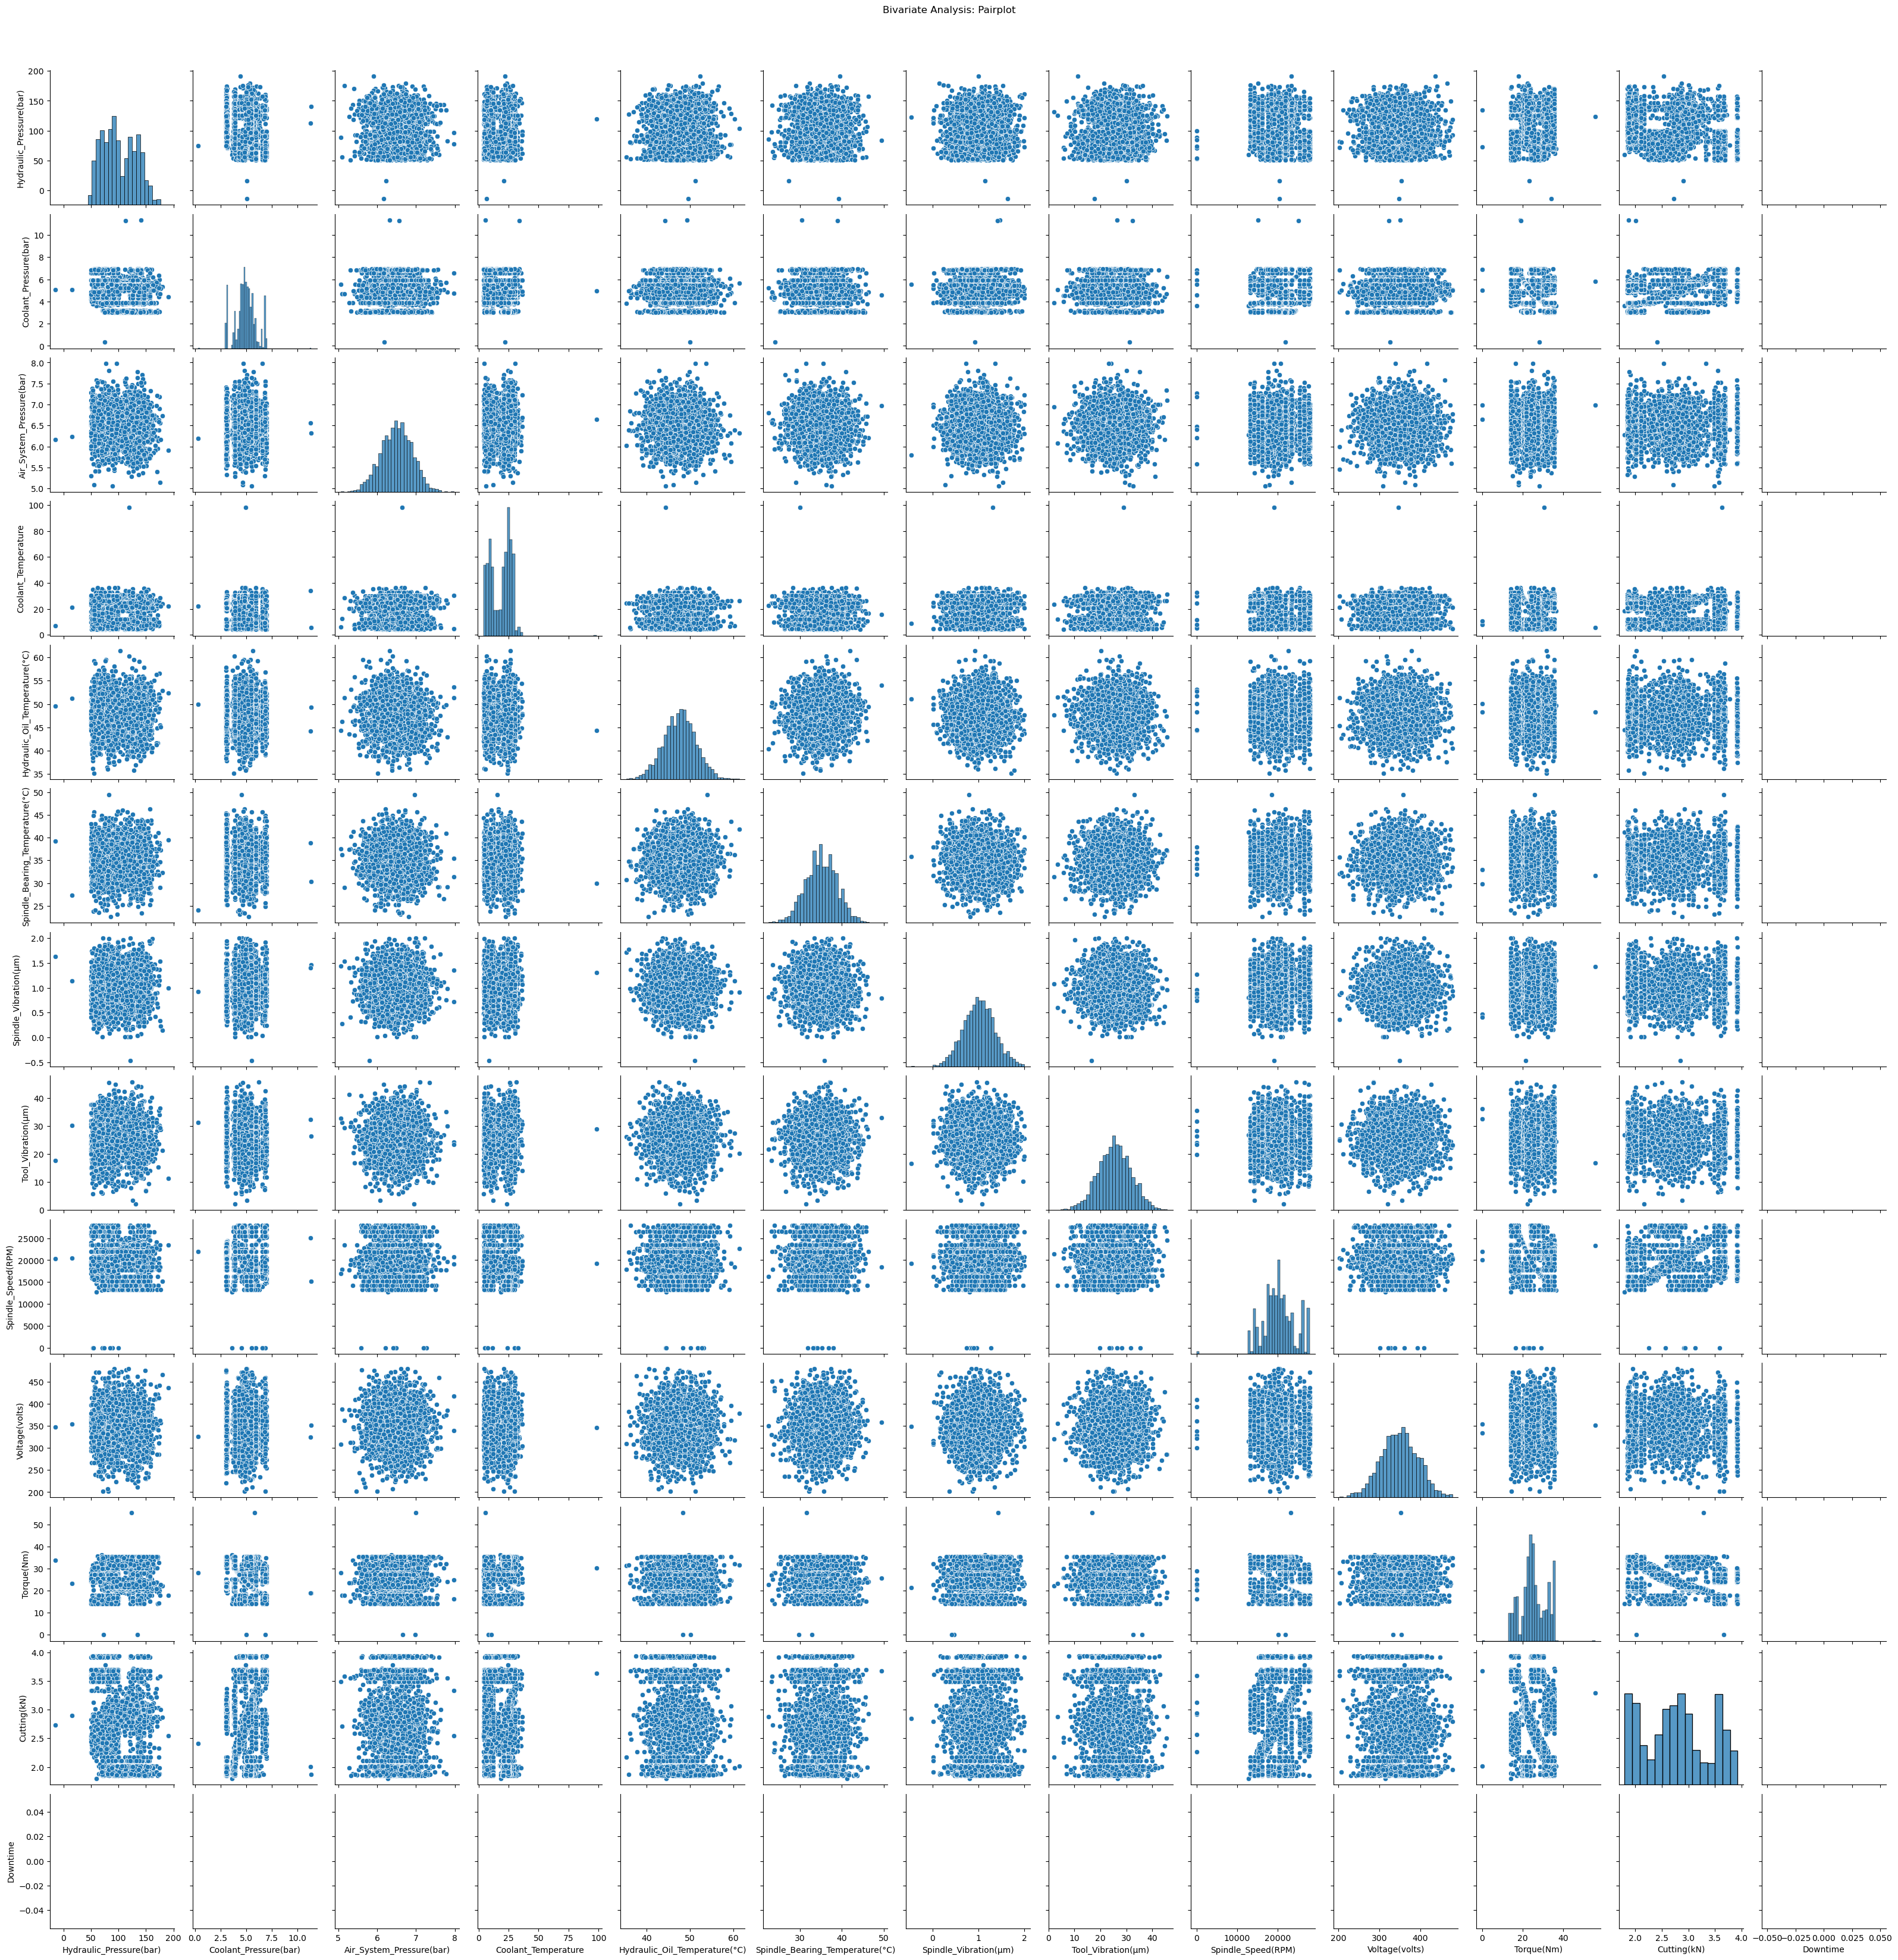

In [27]:
# Bivariate Analysis
# Pairplot to see pairwise relationships
numerical_columns = [col for col in all_columns if df[col].dtype in ['float64', 'int64']]
sns.pairplot(df[numerical_columns])
plt.suptitle("Bivariate Analysis: Pairplot", y=1.02)
plt.show()


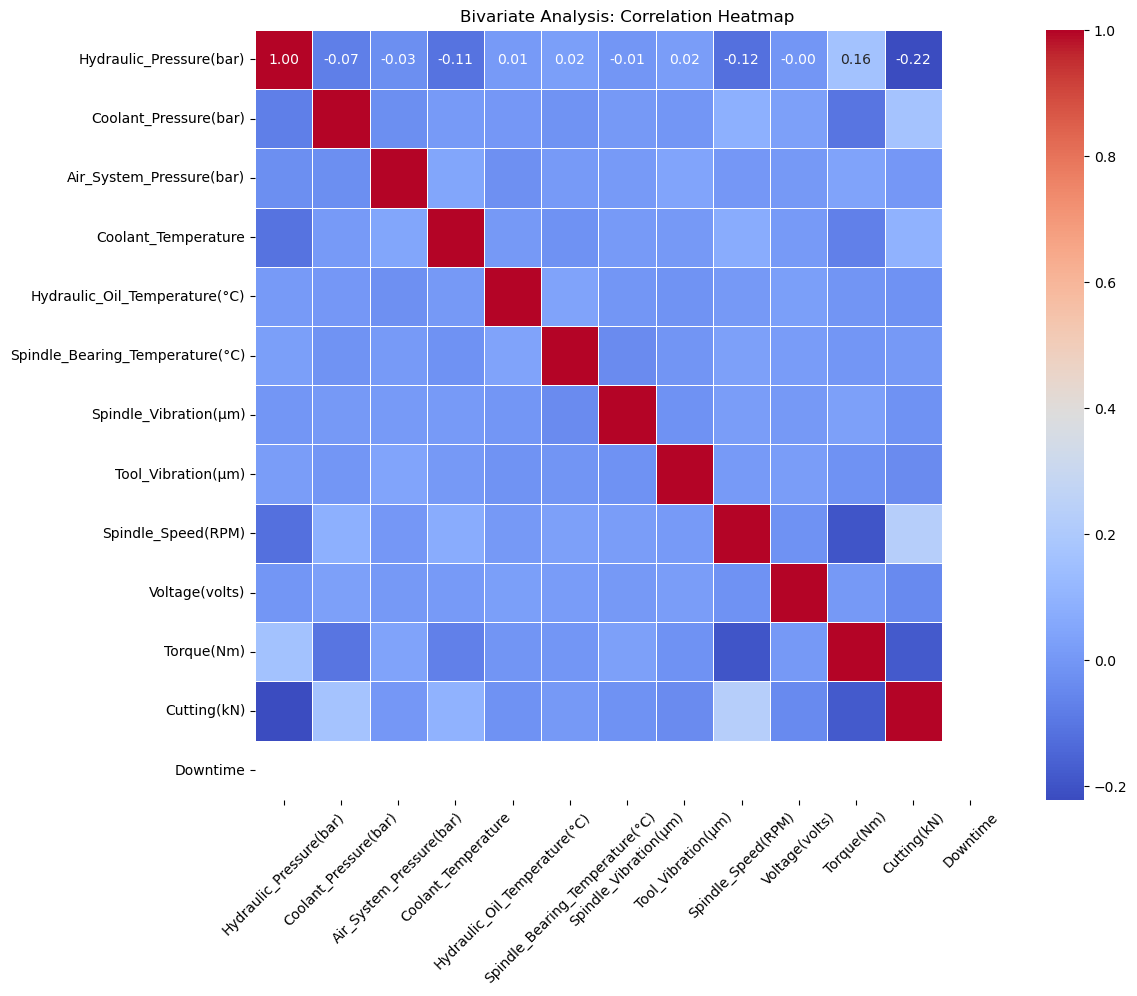

In [28]:
# Correlation Heatmap to see linear relationships
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Bivariate Analysis: Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [29]:
if (df.columns == 'Downtime').all():
    sns.pairplot(df[numerical_columns + ['Downtime']], hue='Downtime')
    plt.suptitle("Multivariate Analysis: Pairplot color-coded by Downtime", y=1.02)
    plt.show()
else:
    print((df.columns == 'Downtime').all())
    


False


In [30]:

# 4. Discretization / Binning / Grouping
print("4. Discretization / Binning / Grouping")
# Example: Discretize 'Coolant_Temperature' into bins
df['Coolant_Temperature_Bin'] = pd.cut(df['Coolant_Temperature'], bins=3, labels=['Low', 'Medium', 'High'])

4. Discretization / Binning / Grouping


### Data Preprocessing

In [31]:
df2=pd.read_csv("Machine Downtime.csv")
df2 = df2[selected_columns]
df2.head()

Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  Air_System_Pressure(bar)  \
0                    71.04               6.933725                  6.284965   
1                   125.33               4.936892                  6.196733   
2                    71.12               6.839413                  6.655448   
3                   139.34               4.574382                  6.560394   
4                    60.51               6.893182                  6.141238   

   Coolant_Temperature  Hydraulic_Oil_Temperature(°C)  \
0                 25.6                           46.0   
1                 35.3                           47.4   
2                 13.1                           40.7   
3                 24.4                           44.2   
4                  4.1                           47.3   

   Spindle_Bearing_Temperature(°C)  Spindle_Vibration(µm)  Tool_Vibration(µm)  \
0                             33.4                  1.291              26.492   
1                             34.6                  1.382              25.274   
2                             33.0                  1.319              30.608   
3                             40.6                  0.618              30.791   
4                             31.4                  0.983              25.516   

   Spindle_Speed(RPM)  Voltage(volts)  Torque(Nm)  Cutting(kN)  
0             25892.0           335.0   24.055326         3.58  
1             19856.0           368.0   14.202890         2.68  
2             19851.0           325.0   24.049267         3.55  
3             18461.0           360.0   25.860029         3.55  
4             26526.0           354.0   25.515874         3.55

In [32]:
#df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')
#df2['Downtime'] = pd.to_numeric(df2['Downtime'], errors='coerce')

In [33]:
#df2.replace([np.inf, -np.inf], np.nan, inplace=True)

In [34]:
df2.describe()

Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
count              2490.000000            2481.000000   
mean                101.409084               4.947058   
std                  30.289301               0.997357   
min                 -14.326454               0.325000   
25%                  76.355000               4.462464   
50%                  96.763486               4.939960   
75%                 126.415727               5.518401   
max                 191.000000              11.350000   

       Air_System_Pressure(bar)  Coolant_Temperature  \
count               2483.000000          2488.000000   
mean                   6.499275            18.559887   
std                    0.407279             8.554480   
min                    5.063480             4.100000   
25%                    6.217987            10.400000   
50%                    6.505191            21.200000   
75%                    6.780550            25.600000   
max                    7.973992            98.200000   

       Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_Temperature(°C)  \
count                    2484.000000                      2493.000000   
mean                       47.618317                        35.063698   
std                         3.768674                         3.764823   
min                        35.200000                        22.600000   
25%                        45.100000                        32.500000   
50%                        47.700000                        35.100000   
75%                        50.100000                        37.600000   
max                        61.400000                        49.500000   

       Spindle_Vibration(µm)  Tool_Vibration(µm)  Spindle_Speed(RPM)  \
count            2489.000000         2489.000000         2494.000000   
mean                1.009334           25.411975        20274.792302   
std                 0.342898            6.437142         3852.660056   
min                -0.461000            2.161000            0.000000   
25%                 0.777000           21.089000        17919.000000   
50%                 1.008000           25.455000        20137.500000   
75%                 1.236000           29.790000        22501.750000   
max                 2.000000           45.726000        27957.000000   

       Voltage(volts)   Torque(Nm)  Cutting(kN)  
count     2494.000000  2479.000000  2493.000000  
mean       348.996792    25.234968     2.782551  
std         45.376024     6.138564     0.616688  
min        202.000000     0.000000     1.800000  
25%        319.000000    21.666115     2.250000  
50%        349.000000    24.647736     2.780000  
75%        380.000000    30.514008     3.270000  
max        479.000000    55.552400     3.930000

In [35]:
print("2. Outlier Analysis / Treatment")
# Identify outliers using a relaxed Z-score threshold and remove them
z_threshold = 4  # Adjust the threshold here
numerical_columns = df2.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(df2[numerical_columns]))
df2_no_outliers = df2[(z_scores < z_threshold).all(axis=1)]


2. Outlier Analysis / Treatment


In [36]:
if df2_no_outliers.empty:
    print("Outlier removal resulted in an empty DataFrame. Skipping outlier removal.")
else:
    df2 = df2_no_outliers

Outlier removal resulted in an empty DataFrame. Skipping outlier removal.


In [37]:
nzv_threshold = 0.01

# Select only the numeric columns for variance calculation
numeric_cols = df2.select_dtypes(include=[np.number]).columns

# Calculate variance only for numeric columns
nzv = df2[numeric_cols].var() <= nzv_threshold

# Drop the columns with near-zero variance
df2 = df2.drop(columns=nzv[nzv].index)

# df2 now has only relevant columns with datetime columns retained as they were


In [38]:
print("4. Discretization / Binning / Grouping")
# Example: Discretize 'Coolant_Temperature' into bins
if 'Coolant_Temperature' in df2.columns:
    df2['Coolant_Temperature_Bin'] = pd.cut(df2['Coolant_Temperature'], bins=3, labels=['Low', 'Medium', 'High'])

4. Discretization / Binning / Grouping


In [39]:
print("5. Missing Values")
# Fill missing values with the mean for numerical columns and mode for categorical columns
for col in df2.columns:
    if df2[col].dtype in [np.float64, np.int64]:
        df2[col].fillna(df2[col].mean(), inplace=True)
    elif df2[col].dtype == 'object':
        df2[col].fillna(df2[col].mode()[0], inplace=True)


5. Missing Values


In [40]:
print("6. Dummy Variable Creation")
# Create dummy variables for categorical columns
df2 = pd.get_dummies(df2, drop_first=True)

6. Dummy Variable Creation


In [41]:
print("7. Transformation")
# Example: Log transformation on 'Hydraulic_Pressure(bar)'
if 'Hydraulic_Pressure(bar)' in df2.columns:
    df2['Hydraulic_Pressure(bar)_log'] = np.log1p(df2['Hydraulic_Pressure(bar)'])


7. Transformation


In [42]:
print("8. Feature Scaling / Feature Shrinking")
# Standard Scaling
scaler = StandardScaler()
numerical_columns = df2.select_dtypes(include=[np.number]).columns
df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])

8. Feature Scaling / Feature Shrinking


In [43]:
if df2.empty:
    raise ValueError("The DataFrame is empty after processing!")

In [44]:
df2.head()

Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  Air_System_Pressure(bar)  \
0                -1.004847               1.999947                 -0.528104   
1                 0.791491              -0.010235                 -0.745525   
2                -1.002200               1.905004                  0.384844   
3                 1.255052              -0.375168                  0.150611   
4                -1.353262               1.959133                 -0.882276   

   Coolant_Temperature  Hydraulic_Oil_Temperature(°C)  \
0             0.825122                      -0.430880   
1             1.961990                      -0.058127   
2            -0.639915                      -1.842016   
3             0.684478                      -0.910134   
4            -1.694741                      -0.084753   

   Spindle_Bearing_Temperature(°C)  Spindle_Vibration(µm)  Tool_Vibration(µm)  \
0                        -0.442615               0.823406            0.168184   
1                        -0.123364               1.089430           -0.021486   
2                        -0.549032               0.905259            0.809139   
3                         1.472893              -1.144004            0.837636   
4                        -0.974700              -0.076984            0.016199   

   Spindle_Speed(RPM)  Voltage(volts)  Torque(Nm)  Cutting(kN)  \
0            1.460053       -0.308895   -0.193020     1.295189   
1           -0.108855        0.419382   -1.805136    -0.166560   
2           -0.110154       -0.529585   -0.194012     1.246464   
3           -0.471450        0.242830    0.102276     1.246464   
4            1.624846        0.110416    0.045964     1.246464   

   Coolant_Temperature_Bin_Medium  Coolant_Temperature_Bin_High  \
0                           False                         False   
1                           False                         False   
2                           False                         False   
3                           False                         False   
4                           False                         False   

   Hydraulic_Pressure(bar)_log  
0                    -1.001885  
1                     0.832054  
2                    -0.998262  
3                     1.175448  
4                    -1.517845

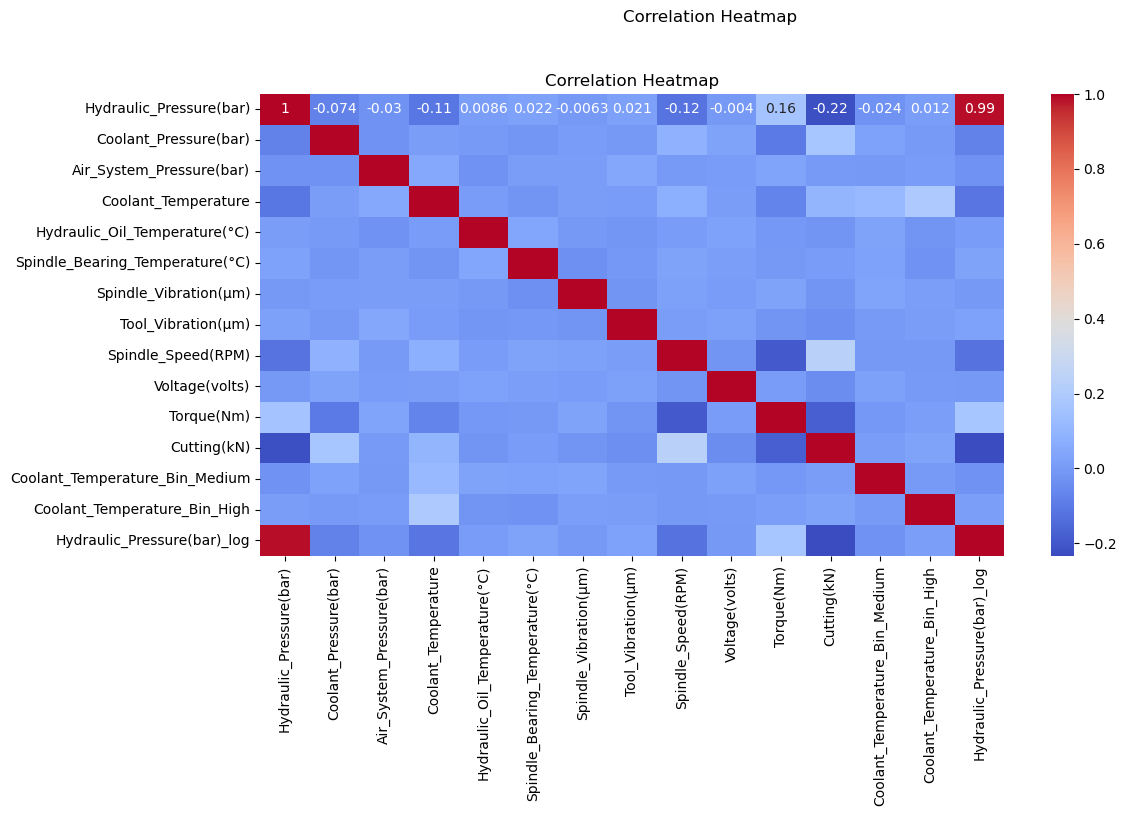

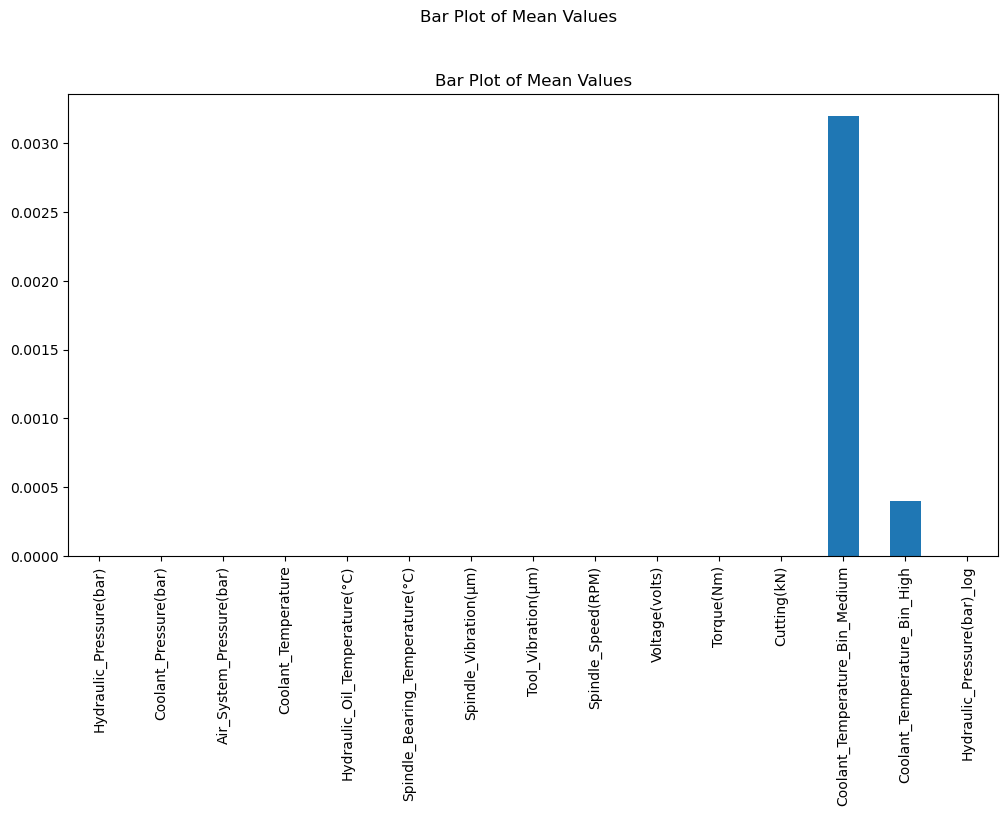

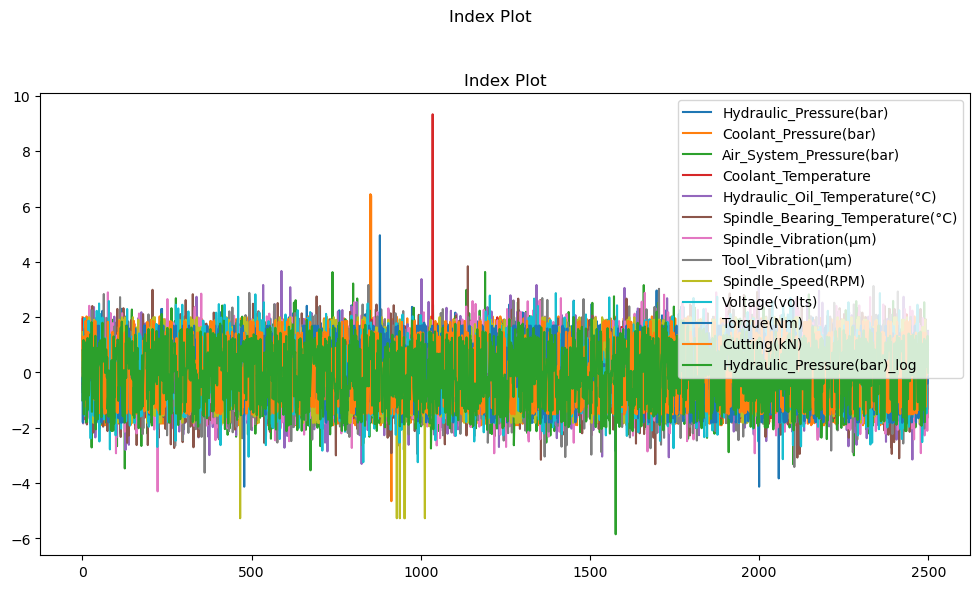

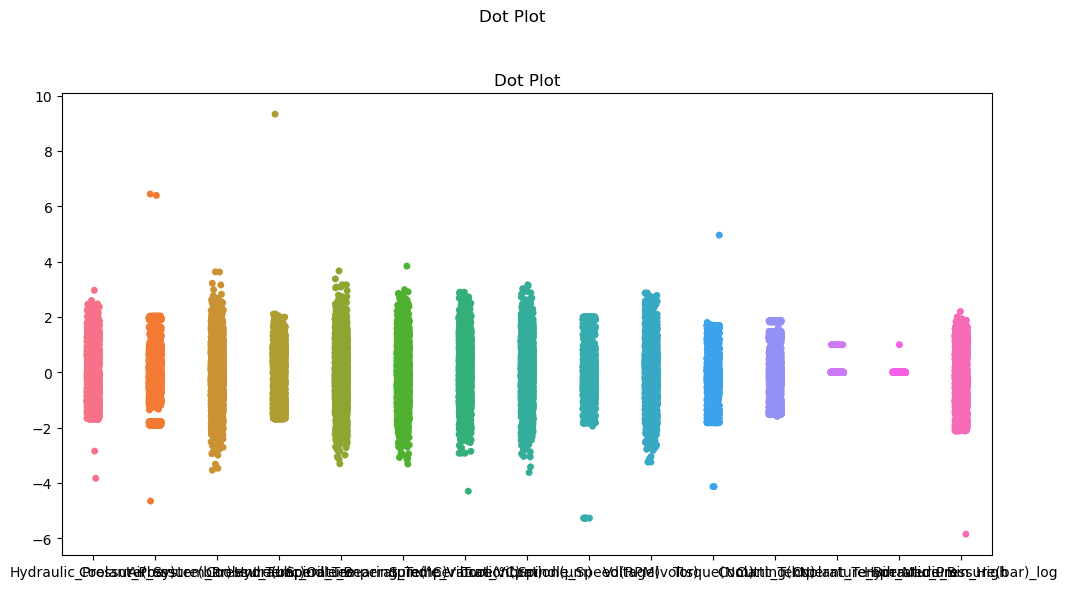

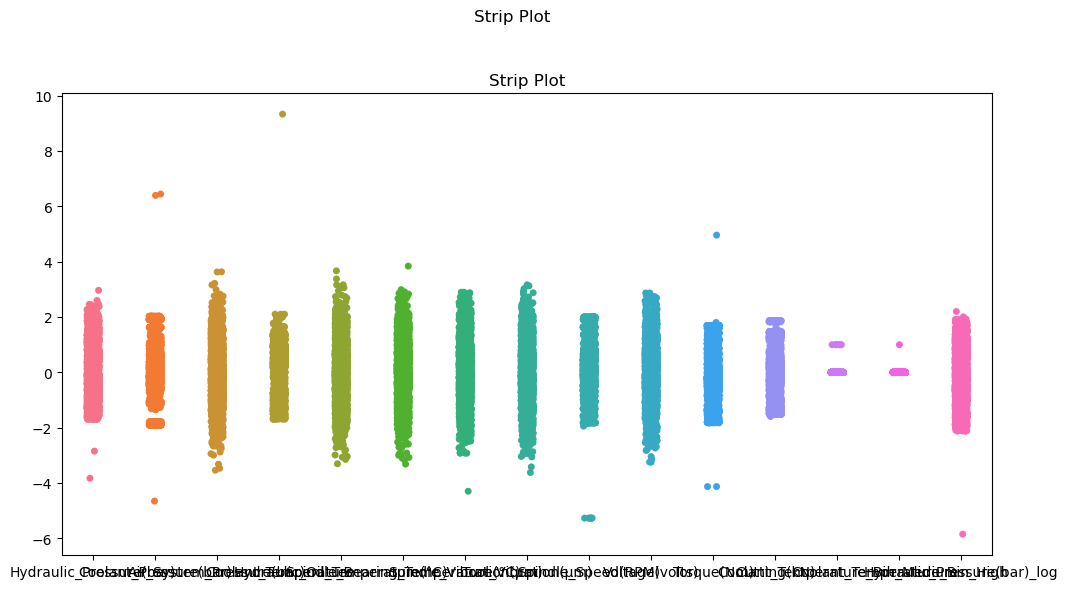

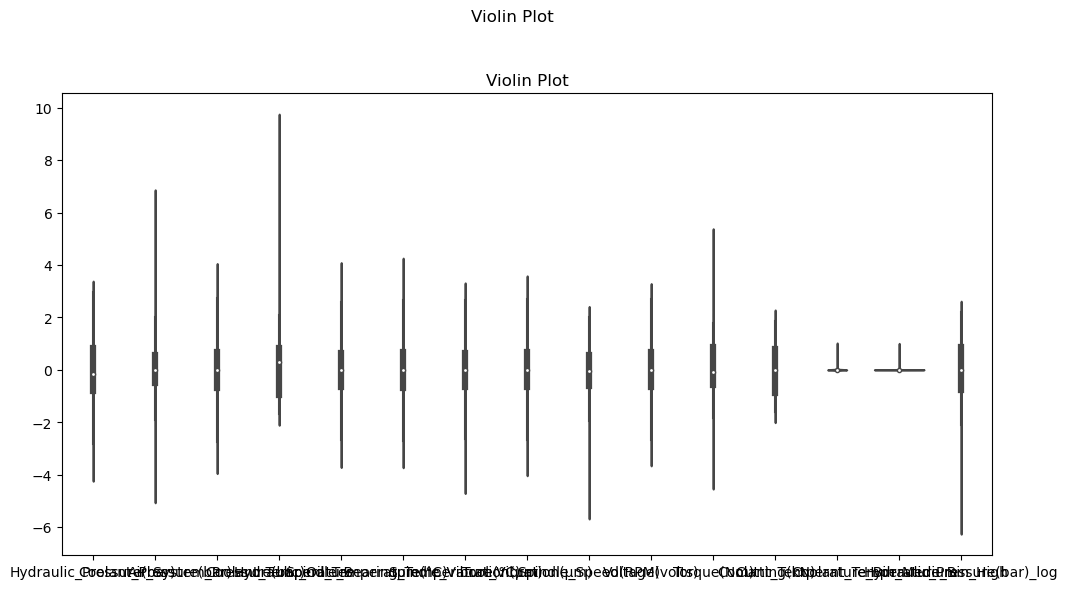

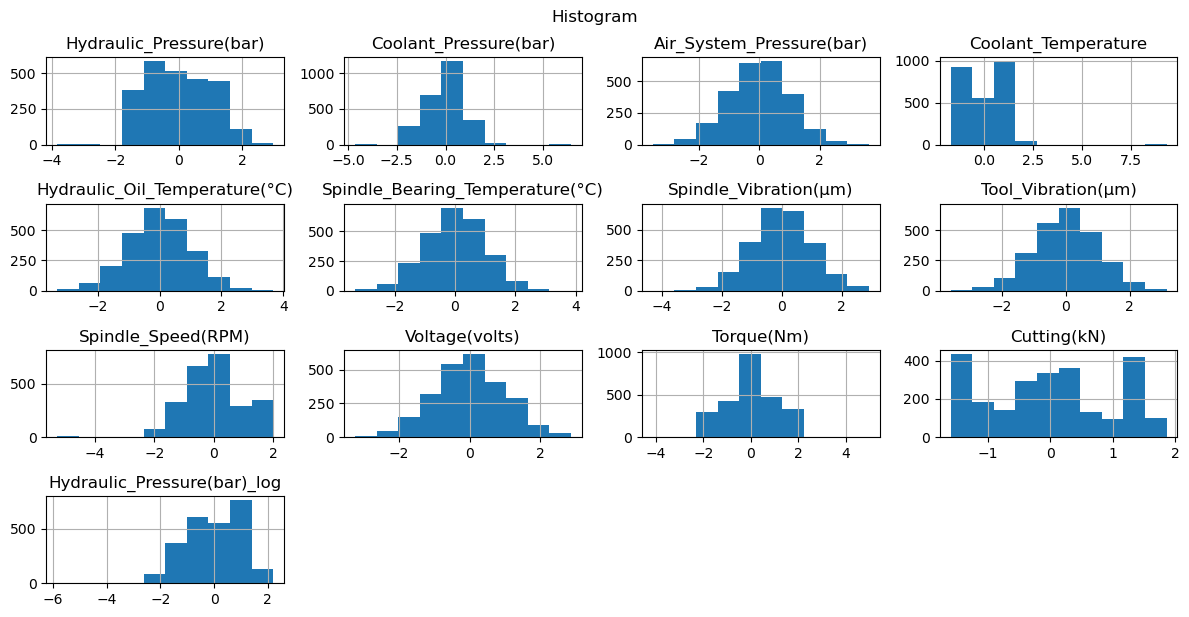

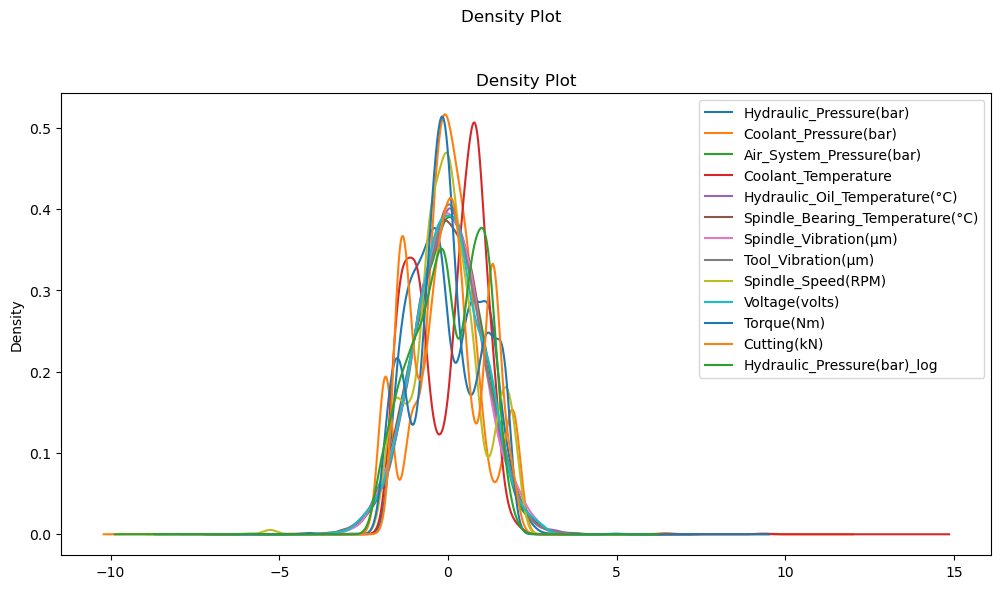

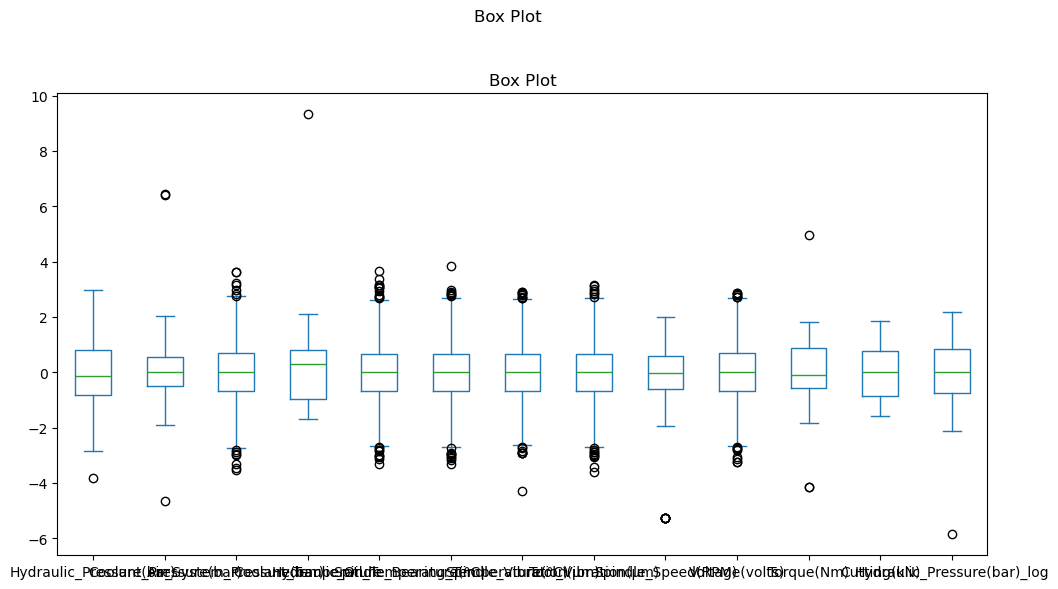

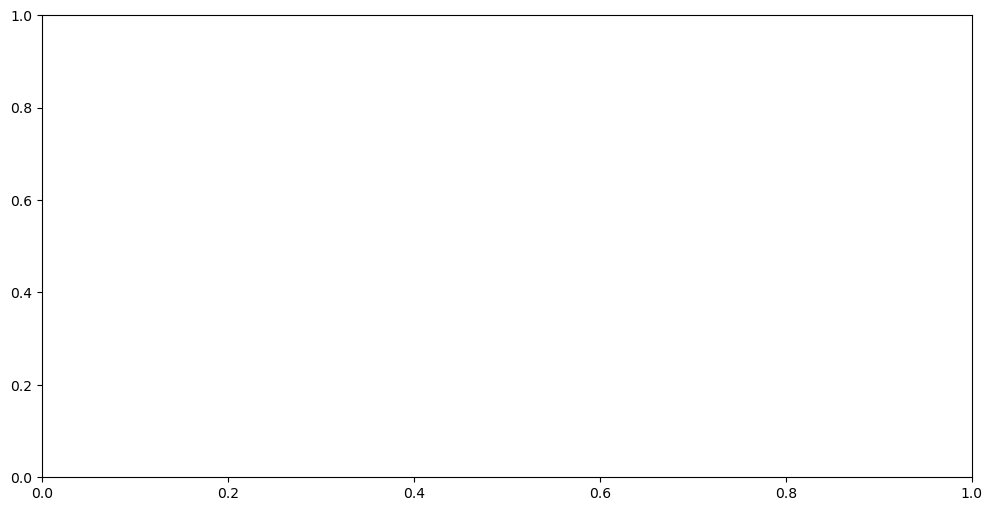

In [45]:

# Function to display and plot various graphs
def display_plot(fig, title):
    fig.suptitle(title, y=1.02)
    plt.show()

# Generate and display various plots
# Correlation Heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Heatmap')
display_plot(fig, 'Correlation Heatmap')

# Bar Plot
fig, ax = plt.subplots(figsize=(12, 6))
df2.mean().plot(kind='bar', ax=ax)
ax.set_title('Bar Plot of Mean Values')
display_plot(fig, 'Bar Plot of Mean Values')

# Index Plot
fig, ax = plt.subplots(figsize=(12, 6))
df2.plot(ax=ax)
ax.set_title('Index Plot')
display_plot(fig, 'Index Plot')

# Dot Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.stripplot(data=df2, ax=ax)
ax.set_title('Dot Plot')
display_plot(fig, 'Dot Plot')

# Strip Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.stripplot(data=df2, ax=ax)
ax.set_title('Strip Plot')
display_plot(fig, 'Strip Plot')

# Violin Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(data=df2, ax=ax)
ax.set_title('Violin Plot')
display_plot(fig, 'Violin Plot')

# Histogram
fig, ax = plt.subplots(figsize=(12, 6))
df2.hist(ax=ax)
plt.tight_layout()
display_plot(fig, 'Histogram')

# Density Plot
fig, ax = plt.subplots(figsize=(12, 6))
df2.plot(kind='density', ax=ax)
ax.set_title('Density Plot')
display_plot(fig, 'Density Plot')

# Box Plot
fig, ax = plt.subplots(figsize=(12, 6))
df2.plot(kind='box', ax=ax)
ax.set_title('Box Plot')
display_plot(fig, 'Box Plot')

In [46]:

print("Data processing complete and saved to 'processed_data.xlsx'.")

Data processing complete and saved to 'processed_data.xlsx'.
